Question 1: Binary Classification with Logistic Regression<br>

Description:<br>
Use logistic regression to classify the famous Iris dataset into two classes: Versicolor and Not-Versicolor.

In [1]:
# q1.py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import pandas as pd

def load_binary_iris():
    try:
        iris = load_iris()
        df = pd.DataFrame(iris.data, columns=iris.feature_names)
        df['Species'] = iris.target
        df['Binary_Species'] = df['Species'].apply(lambda x: 1 if x == 1 else 0)
        return df, iris.feature_names
    except Exception as e:
        raise RuntimeError(f"Failed to load and process dataset: {e}")

def train_logistic_regression(X, y):
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = LogisticRegression(max_iter=200)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        return acc, y_pred
    except Exception as e:
        raise RuntimeError(f"Error training logistic regression model: {e}")

if __name__ == "__main__":
    df, features = load_binary_iris()
    X = df[features]
    y = df['Binary_Species']
    accuracy, predictions = train_logistic_regression(X, y)
    print(f"Accuracy: {accuracy}")
    print(f"Predictions on Test Set: {predictions}")


Accuracy: 0.8
Predictions on Test Set: [1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0]


Question 2: Multi-Class Classification with Decision Trees<br>

Description:<br>
Classify the Iris dataset using a Decision Tree classifier and visualize the decision tree.

In [2]:
# q2.py
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris
import pandas as pd

def load_iris_dataset():
    try:
        iris = load_iris()
        df = pd.DataFrame(iris.data, columns=iris.feature_names)
        df['target'] = iris.target
        return df, iris.feature_names, iris.target_names
    except Exception as e:
        raise RuntimeError(f"Failed to load dataset: {e}")

def train_knn_classifier(X, y, n_neighbors=3):
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = KNeighborsClassifier(n_neighbors=n_neighbors)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        return accuracy, report, y_pred
    except Exception as e:
        raise RuntimeError(f"Error in KNN classification: {e}")

if __name__ == "__main__":
    df, features, class_names = load_iris_dataset()
    X = df[features]
    y = df['target']
    acc, clf_report, predictions = train_knn_classifier(X, y)
    print(f"Accuracy: {acc}")
    print("Classification Report:")
    print(clf_report)


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Question 3: K-Nearest Neighbors for Binary Classification<br>

Description:<br>
Use K-Nearest Neighbors to classify the Breast Cancer dataset into two classes: Malignant and Benign.

In [3]:
# q3.py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_breast_cancer
import pandas as pd

def load_binary_classification_dataset():
    try:
        data = load_breast_cancer()
        df = pd.DataFrame(data.data, columns=data.feature_names)
        df['target'] = data.target
        return df, data.feature_names, data.target_names
    except Exception as e:
        raise RuntimeError(f"Failed to load breast cancer dataset: {e}")

def train_logistic_regression(X, y):
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = LogisticRegression(max_iter=1000)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        return accuracy, report, y_pred
    except Exception as e:
        raise RuntimeError(f"Error in Logistic Regression classification: {e}")

if __name__ == "__main__":
    df, features, class_names = load_binary_classification_dataset()
    X = df[features]
    y = df['target']
    acc, clf_report, predictions = train_logistic_regression(X, y)
    print(f"Accuracy: {acc}")
    print("Classification Report:")
    print(clf_report)


Accuracy: 0.956140350877193
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Question 4: Evaluate Classification Model using Confusion Matrix<br>

Description:<br>
Evaluate the performance of the K-Nearest Neighbors classifier from Question 3 using a
confusion matrix.

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

def load_iris_dataset():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['target'] = iris.target
    return df, iris.target

def train_random_forest(X, y):
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        clf = RandomForestClassifier(n_estimators=100, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
        print("Classification Report:\n", classification_report(y_test, y_pred))
    except Exception as e:
        print(f"Error training Random Forest model: {e}")

if __name__ == "__main__":
    df, target = load_iris_dataset()
    train_random_forest(df.drop(columns=["target"]), target)



Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Question 5: SVM Classifier for Multi-Class Classification<br>

Description:<br>
Classify the Wine dataset using Support Vector Machine and check the model's performance.

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

def load_iris_dataset():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['target'] = iris.target
    return df, iris.target

def train_svm_classifier(X, y):
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        clf = SVC(kernel='linear')
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
        print("Classification Report:\n", classification_report(y_test, y_pred))
    except Exception as e:
        print(f"Error training SVM model: {e}")

if __name__ == "__main__":
    df, target = load_iris_dataset()
    train_svm_classifier(df.drop(columns=["target"]), target)



Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Question 6: Precision, Recall, and F1-Score<br>

Description:<br>
Calculate precision, recall, and F1-score for the SVM model trained on the Wine dataset.

In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_wine
import pandas as pd

# Function to calculate and print precision, recall, and F1-score
def evaluate_metrics(y_test, y_pred):
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")

# Load Wine dataset
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['Target'] = wine.target

# Define features and target variable
X = df[wine.feature_names]
y = df['Target']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM model
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate metrics
evaluate_metrics(y_test, y_pred)


Precision: 1.0
Recall: 1.0
F1-Score: 1.0


Question 7: Random Forest for Binary Classification with Feature Importance<br>

Description:<br>
Train a Random Forest classifier on the Breast Cancer dataset and display feature
importances.

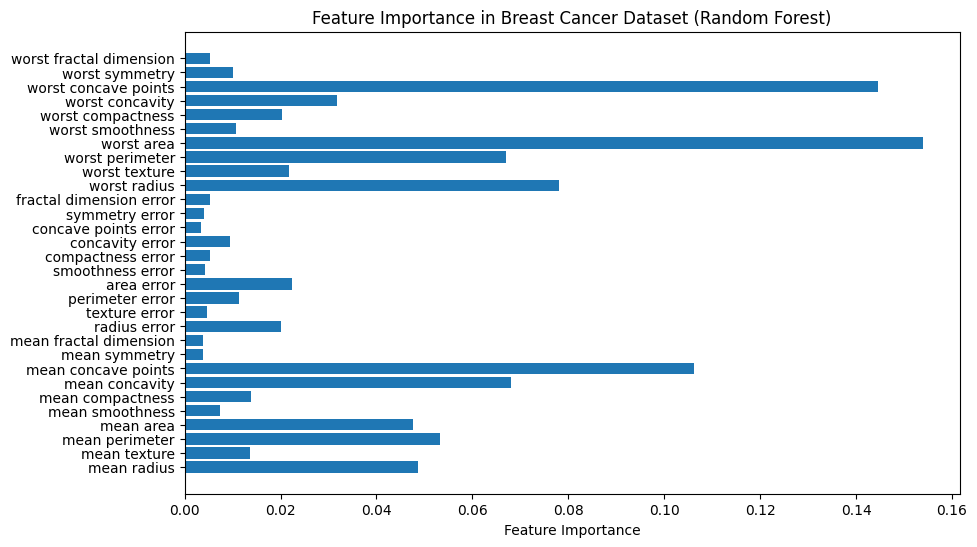

In [8]:
# Write your code from here
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt

# Function to plot feature importances
def plot_feature_importances(model, feature_names):
    feature_importances = model.feature_importances_
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, feature_importances)
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance in Breast Cancer Dataset (Random Forest)')
    plt.show()

# Function to train Random Forest and plot feature importances
def random_forest_classifier(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    plot_feature_importances(model, X_train.columns)

# Load Breast Cancer dataset
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['Target'] = cancer.target

# Define features and target variable
X = df[cancer.feature_names]
y = df['Target']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model and plot feature importances
random_forest_classifier(X_train, X_test, y_train, y_test)


Question 8: ROC-AUC Curve for Binary Classification<br>

Description:<br>
Plot the ROC-AUC curve for the Random Forest model on the Breast Cancer dataset.

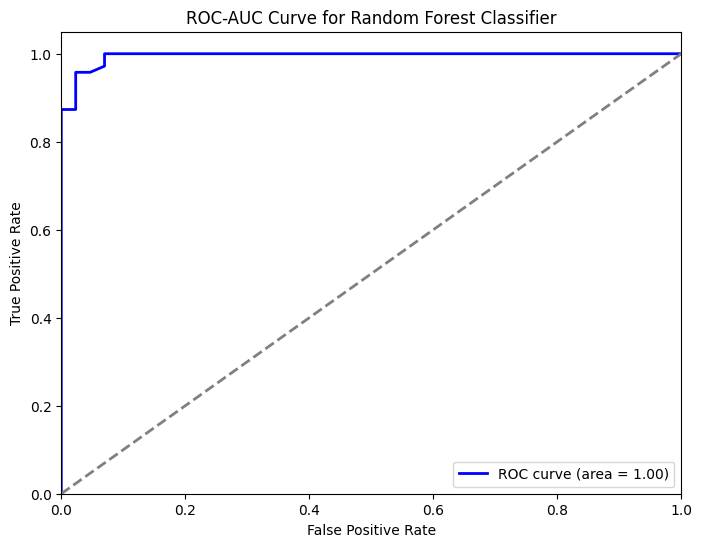

In [9]:
# Write your code from here
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot ROC-AUC curve
def plot_roc_auc_curve(fpr, tpr, roc_auc):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC Curve for Random Forest Classifier')
    plt.legend(loc='lower right')
    plt.show()

# Function to train Random Forest and plot ROC-AUC curve
def random_forest_roc_auc(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plot_roc_auc_curve(fpr, tpr, roc_auc)

# Load Breast Cancer dataset
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['Target'] = cancer.target

# Define features and target variable
X = df[cancer.feature_names]
y = df['Target']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model and plot ROC-AUC curve
random_forest_roc_auc(X_train, X_test, y_train, y_test)


Question 9: Hyperparameter Tuning with Grid Search for SVM Classifier<br>

Description:<br>
Perform hyperparameter tuning on the SVM classifier for the Wine dataset using GridSearchCV.

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score
import pandas as pd

# Function to perform hyperparameter tuning with GridSearchCV
def tune_svm_hyperparameters(X_train, y_train):
    svm = SVC(random_state=42)
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
    grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_

# Function to train and evaluate the best SVM model
def svm_classifier_with_best_params(X_train, X_test, y_train, y_test):
    best_params = tune_svm_hyperparameters(X_train, y_train)
    print(f"Best Parameters: {best_params}")
    svm = SVC(kernel=best_params['kernel'], C=best_params['C'], gamma=best_params['gamma'], random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

# Load Wine dataset
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['Target'] = wine.target

# Define features and target variable
X = df[wine.feature_names]
y = df['Target']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the SVM model
svm_classifier_with_best_params(X_train, X_test, y_train, y_test)


Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 1.0


Question 10: Ensemble Learning using Voting Classifier<br>

Description:<br>
Combine different classifiers to form a voting ensemble and classify the Iris dataset.

In [12]:
# Write your code from here
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Function to train and evaluate the voting ensemble model
def ensemble_voting_classifier(X_train, X_test, y_train, y_test):
    # Initialize individual classifiers
    clf1 = DecisionTreeClassifier(random_state=42)
    clf2 = SVC(probability=True, random_state=42)
    clf3 = KNeighborsClassifier()

    # Create the voting classifier (soft voting)
    voting_clf = VotingClassifier(estimators=[('dt', clf1), ('svc', clf2), ('knn', clf3)], voting='soft')

    # Train the ensemble model
    voting_clf.fit(X_train, y_train)

    # Make predictions
    y_pred = voting_clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Ensemble Model Accuracy: {accuracy}")

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Target'] = iris.target

# Define features and target variable
X = df[iris.feature_names]
y = df['Target']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the ensemble voting classifier
ensemble_voting_classifier(X_train, X_test, y_train, y_test)


Ensemble Model Accuracy: 1.0
